<a href="https://colab.research.google.com/github/dani118089/assingment/blob/main/case_study_ml_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [2]:
url='/content/drive/MyDrive/DSA/fish.csv'
df_fish=pd.read_csv(url,header=None)
df_fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [3]:
df_fish.describe()

,1,2,3,4,5,6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [4]:
# df_fish.columns=['Species','Weight','Length1','Length2','Length3','Height','Width']

In [5]:
df_fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [6]:
df_fish.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


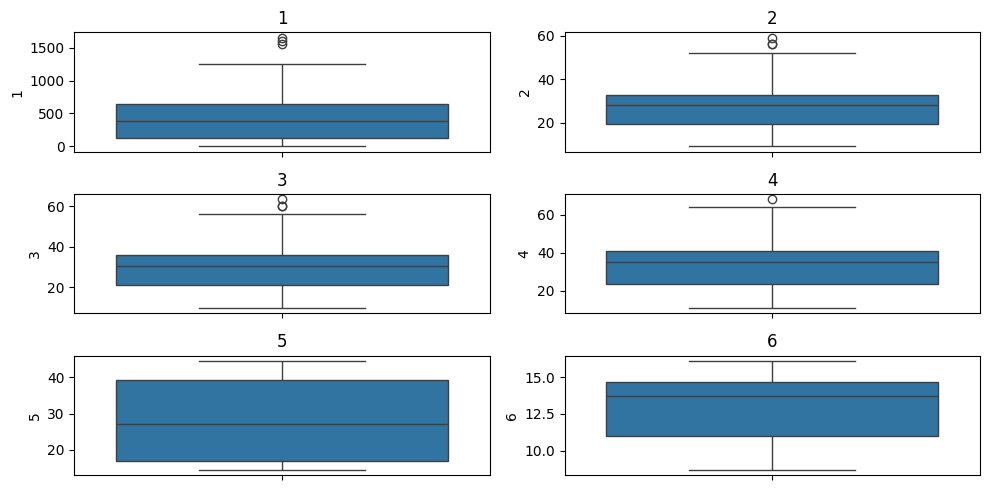

In [7]:
plt.figure(figsize=(10, 5))

# Get numerical columns excluding 'Species'
numerical_cols = df_fish.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numerical_cols):
  plt.subplot(3, 2, i + 1)  # Adjust subplot grid based on number of numerical columns
  sns.boxplot(y=df_fish[col])
  plt.title(col)

plt.tight_layout()
plt.show()

In [8]:
bxcolums=[1,2,3,4]
Q1=df_fish[bxcolums].quantile(0.25)
Q3=df_fish[bxcolums].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

1    120.0
2     19.4
3     21.0
4     23.7
Name: 0.25, dtype: float64 1    650.0
2     32.7
3     36.0
4     40.6
Name: 0.75, dtype: float64 1    530.0
2     13.3
3     15.0
4     16.9
dtype: float64 1   -675.00
2     -0.55
3     -1.50
4     -1.65
dtype: float64 1    1445.00
2      52.65
3      58.50
4      65.95
dtype: float64


In [9]:
filter_out = ~((df_fish[bxcolums] < (Q1 - 1.5 * IQR)) | (df_fish[bxcolums] > (Q3 + 1.5 * IQR))).any(axis=1)
print(filter_out)

0      True
1      True
2      True
3      True
4      True
      ...  
80     True
81     True
82    False
83    False
84    False
Length: 85, dtype: bool


In [10]:
fish_new=df_fish[filter_out]

In [11]:
df_fish.shape

(85, 7)

In [12]:
fish_new.shape

(82, 7)

In [13]:
fish_new.duplicated().sum()

np.int64(0)

In [14]:
fish_new.T.duplicated().sum()

np.int64(0)

scaling

In [15]:
scaler=MinMaxScaler()
fish_new[bxcolums]=scaler.fit_transform(fish_new[bxcolums])

/tmp/ipython-input-3903298486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_new[bxcolums]=scaler.fit_transform(fish_new[bxcolums])


In [16]:
fish_new

,0,1,2,3,4,5,6
0,Bream,0.1936,0.325527,0.337662,0.392638,38.4,13.4
1,Bream,0.2320,0.344262,0.357143,0.417178,40.0,13.8
2,Bream,0.2720,0.341920,0.361472,0.415133,39.8,15.1
3,Bream,0.2904,0.398126,0.415584,0.464213,38.0,13.3
4,Bream,0.3440,0.402810,0.415584,0.474438,36.6,15.1
...,...,...,...,...,...,...,...
77,Pike,0.4000,0.765808,0.761905,0.760736,14.5,10.2
78,Pike,0.4536,0.793911,0.783550,0.775051,16.0,10.0
79,Pike,0.6160,0.831382,0.826840,0.826176,15.0,10.5
80,Pike,0.7600,0.913349,0.906926,0.905930,16.2,11.2


K-Means

In [17]:
fish=fish_new.drop(columns=[0])
fish

,1,2,3,4,5,6
0,0.1936,0.325527,0.337662,0.392638,38.4,13.4
1,0.2320,0.344262,0.357143,0.417178,40.0,13.8
2,0.2720,0.341920,0.361472,0.415133,39.8,15.1
3,0.2904,0.398126,0.415584,0.464213,38.0,13.3
4,0.3440,0.402810,0.415584,0.474438,36.6,15.1
...,...,...,...,...,...,...
77,0.4000,0.765808,0.761905,0.760736,14.5,10.2
78,0.4536,0.793911,0.783550,0.775051,16.0,10.0
79,0.6160,0.831382,0.826840,0.826176,15.0,10.5
80,0.7600,0.913349,0.906926,0.905930,16.2,11.2


In [18]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(fish_new.drop(0,axis=1))
  wcss.append(kmeans.inertia_)

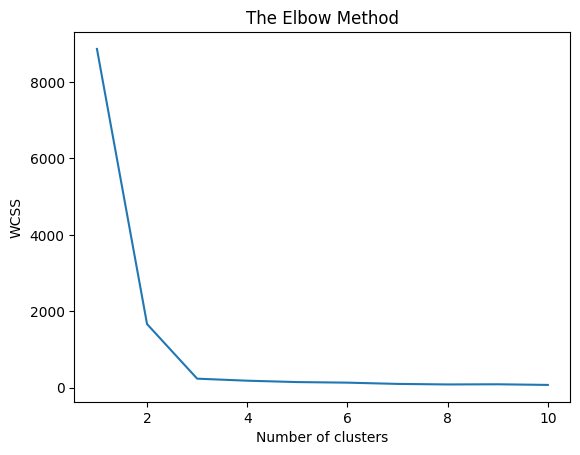

In [19]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
#from the elbow plot , we can fix values of k as 3
#building the kmeans clustering model
kmeans= KMeans(n_clusters=3, init='k-means++') #max_iter can be set if we need to fix the number of iterations
y_kmeans= kmeans.fit_predict(fish) #output generation

In [21]:
fish['Cluster']=y_kmeans
fish.head()

,1,2,3,4,5,6,Cluster
0,0.1936,0.325527,0.337662,0.392638,38.4,13.4,0
1,0.2320,0.344262,0.357143,0.417178,40.0,13.8,0
2,0.2720,0.341920,0.361472,0.415133,39.8,15.1,0
3,0.2904,0.398126,0.415584,0.464213,38.0,13.3,0
4,0.3440,0.402810,0.415584,0.474438,36.6,15.1,0


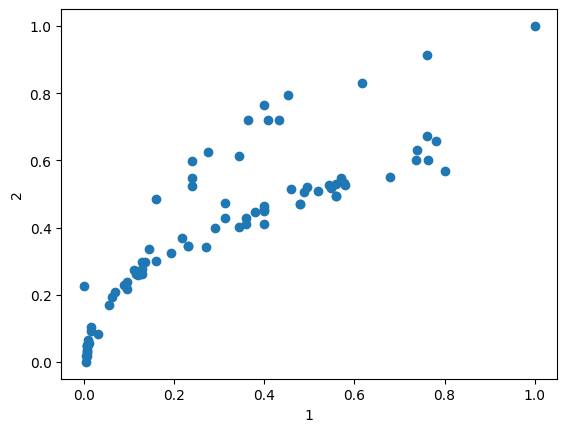

In [22]:
#before clustering
plt.scatter(fish[1],fish[2])
plt.xlabel(1)
plt.ylabel(2)
plt.show()

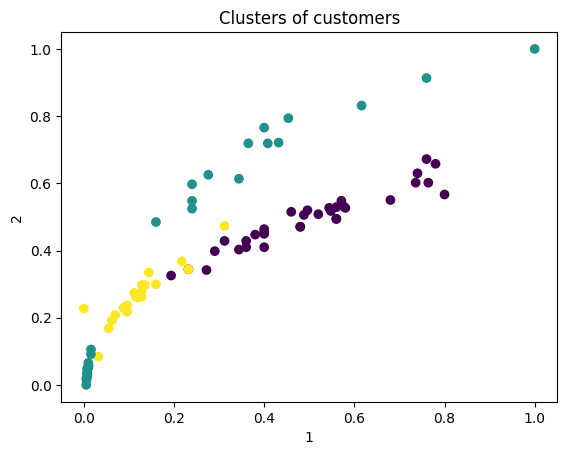

In [23]:
#after clustering
plt.scatter(fish[1],fish[2],c= fish['Cluster'])
plt.title('Clusters of customers')
plt.xlabel(1)
plt.ylabel(2)
plt.show()

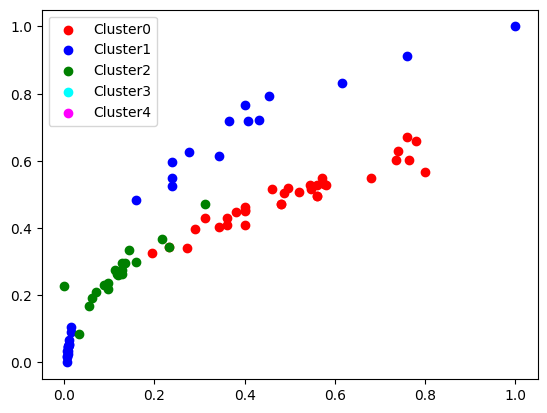

In [24]:
colors= ['red','blue','green','cyan','magenta']
for i in range(5):
  cluster_data= fish[y_kmeans==i]
  plt.scatter(fish[fish['Cluster']==i][1],
              fish[fish['Cluster']==i][2],
              c=colors[i],label=f'Cluster{i}')
plt.legend()

In [25]:
#predict the cluster
def predict_cluster(a,b,c,d,e,f):
  new_data= [[a,b,c,d,e,f]]
  cluster=kmeans.predict(new_data)
  return cluster[0]

In [26]:
predicted_cluster= predict_cluster(50,100,20,30,40,15)
print("the values belong to the cluster",predicted_cluster)

the values belong to the cluster 0


# **Agglomerative Hierarchical Clustering**

In [27]:
ag_cluster =linkage(fish,method='ward') #ward, singlee, centroid
#linkage matrix i.e; agglomerative cluster model

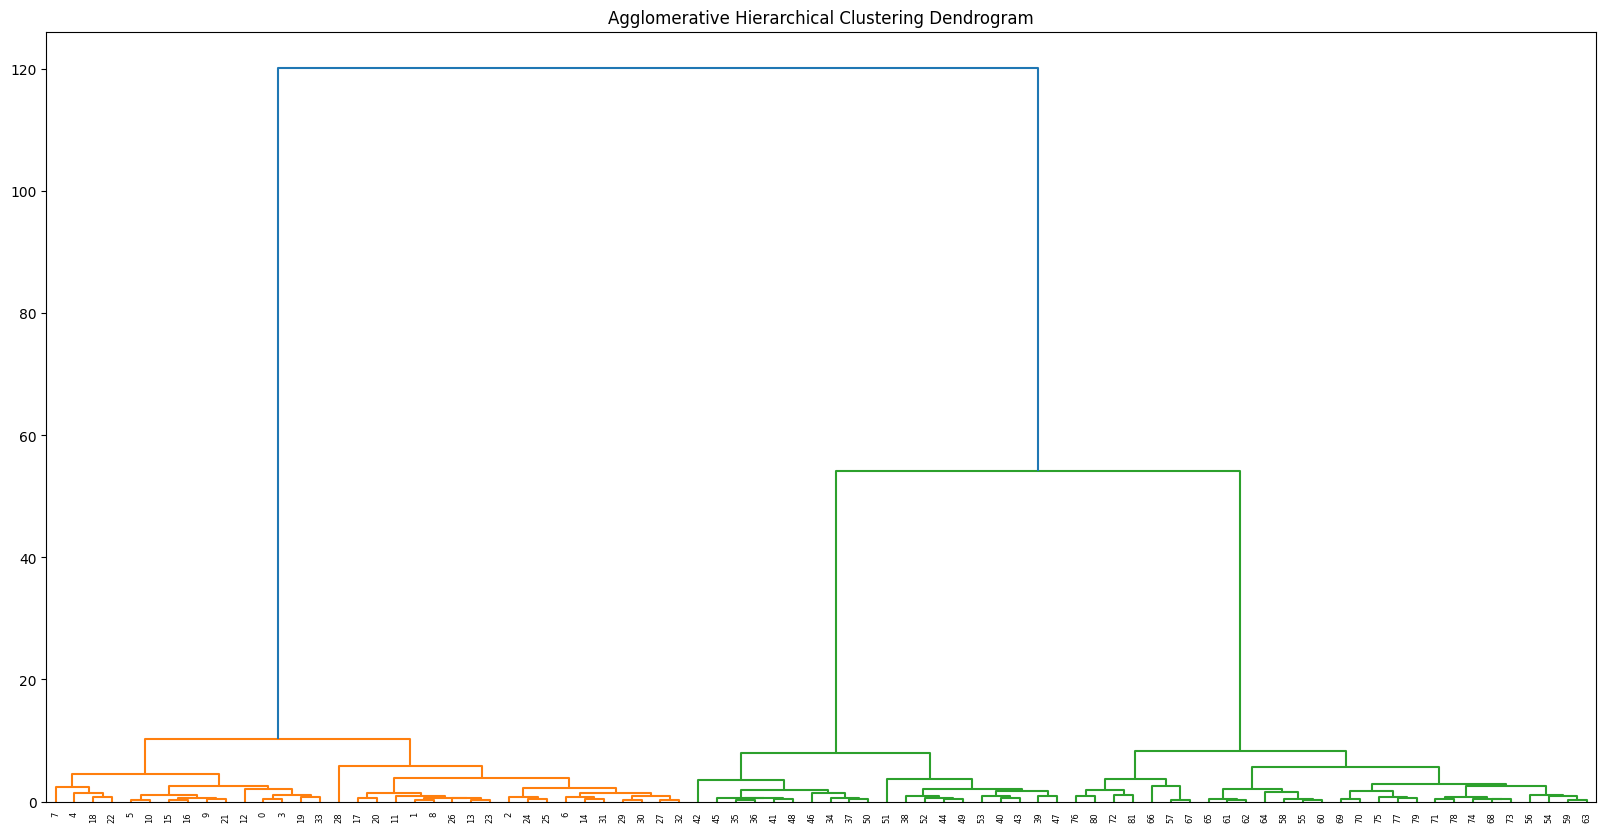

In [28]:
# plt.figure(figsize=(20,10))
# plt.title('Agglomerative Hierarchical Clustering Dendrogram')
# plt.axhline(y=200, color='y',linestyle='--')
# dendrogram(ag_cluster)
# plt.show()
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')

# Draw dendrogram
dendrogram(ag_cluster)

# Draw horizontal cut line
plt.axhline(y=200, color='yellow', linestyle='--', linewidth=2)

plt.show()

In [29]:
cluster_labels=fcluster(ag_cluster, t=200, criterion='distance')
fish['cluster_agglomerative']= cluster_labels
fish.head()

,1,2,3,4,5,6,Cluster,cluster_agglomerative
0,0.1936,0.325527,0.337662,0.392638,38.4,13.4,0,1
1,0.2320,0.344262,0.357143,0.417178,40.0,13.8,0,1
2,0.2720,0.341920,0.361472,0.415133,39.8,15.1,0,1
3,0.2904,0.398126,0.415584,0.464213,38.0,13.3,0,1
4,0.3440,0.402810,0.415584,0.474438,36.6,15.1,0,1


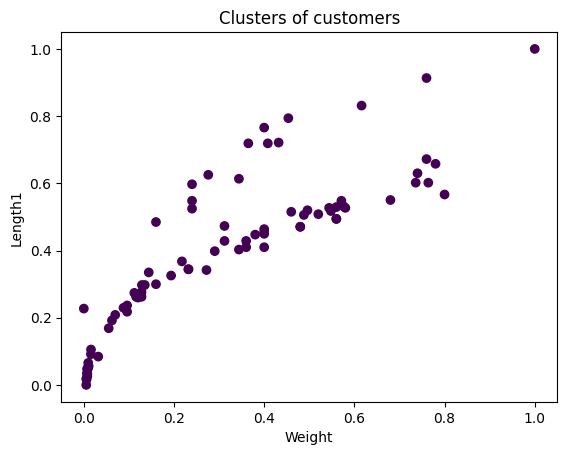

In [30]:
#after clustering
plt.scatter(fish[1],fish[2], c= fish['cluster_agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

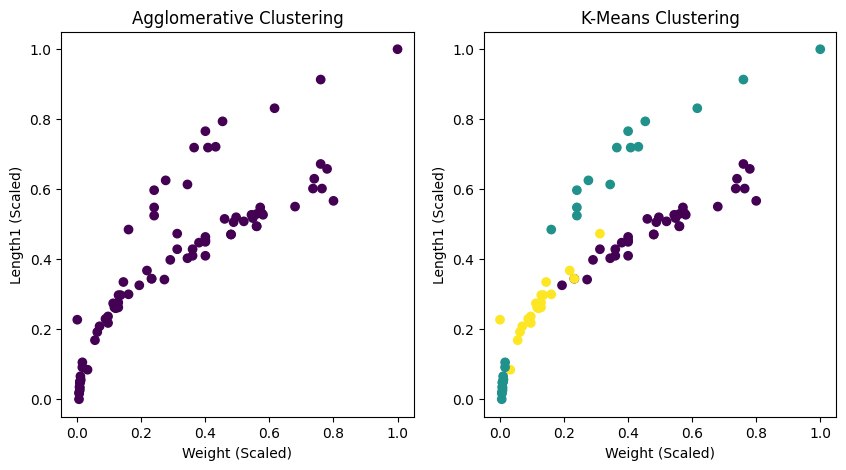

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(fish[1],fish[2], c= fish['cluster_agglomerative'])
plt.title('Agglomerative Clustering')
plt.xlabel('Weight (Scaled)')
plt.ylabel('Length1 (Scaled)')

plt.subplot(1,2,2)
plt.scatter(fish[1],fish[2], c= fish['Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Weight (Scaled)')
plt.ylabel('Length1 (Scaled)')
plt.show()